In [2]:
import random
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

Выполнение заданий 1 и 2:

In [3]:
df = pd.read_csv('annotation.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))
pd.concat([df.head(), df.tail()])

,AbsPath,Name
0,C:\Users\Alex\Desktop\dataset\bay_horse\0001.jpg,bay_horse
1,C:\Users\Alex\Desktop\dataset\bay_horse\0002.jpg,bay_horse
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse
2192,C:\Users\Alex\Desktop\dataset\zebra\1044.jpg,zebra
2193,C:\Users\Alex\Desktop\dataset\zebra\1045.jpg,zebra
2194,C:\Users\Alex\Desktop\dataset\zebra\1046.jpg,zebra
2195,C:\Users\Alex\Desktop\dataset\zebra\1047.jpg,zebra
2196,C:\Users\Alex\Desktop\dataset\zebra\1048.jpg,zebra


Выполнение задания 3:

In [4]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'bay_horse' else 1)
pd.concat([df.head(), df.tail()])

,AbsPath,Name,Class
0,C:\Users\Alex\Desktop\dataset\bay_horse\0001.jpg,bay_horse,0
1,C:\Users\Alex\Desktop\dataset\bay_horse\0002.jpg,bay_horse,0
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse,0
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse,0
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse,0
2192,C:\Users\Alex\Desktop\dataset\zebra\1044.jpg,zebra,1
2193,C:\Users\Alex\Desktop\dataset\zebra\1045.jpg,zebra,1
2194,C:\Users\Alex\Desktop\dataset\zebra\1046.jpg,zebra,1
2195,C:\Users\Alex\Desktop\dataset\zebra\1047.jpg,zebra,1
2196,C:\Users\Alex\Desktop\dataset\zebra\1048.jpg,zebra,1


Выполнение задания 4:

In [5]:
def get_image_dimensions(image_path):
    image = cv2.imread(image_path)
    height, width, depth = image.shape
    return height, width, depth
df['Height'], df['Width'], df['Depth'] = zip(*df['AbsPath'].map(get_image_dimensions))
#df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])
#df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])
#df['Depth'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])
pd.concat([df.head(), df.tail()])

,AbsPath,Name,Class,Height,Width,Depth
0,C:\Users\Alex\Desktop\dataset\bay_horse\0001.jpg,bay_horse,0,2064,2890,3
1,C:\Users\Alex\Desktop\dataset\bay_horse\0002.jpg,bay_horse,0,1365,2048,3
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse,0,850,1332,3
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse,0,800,999,3
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse,0,380,570,3
2192,C:\Users\Alex\Desktop\dataset\zebra\1044.jpg,zebra,1,1536,2048,3
2193,C:\Users\Alex\Desktop\dataset\zebra\1045.jpg,zebra,1,810,1080,3
2194,C:\Users\Alex\Desktop\dataset\zebra\1046.jpg,zebra,1,540,800,3
2195,C:\Users\Alex\Desktop\dataset\zebra\1047.jpg,zebra,1,1024,937,3
2196,C:\Users\Alex\Desktop\dataset\zebra\1048.jpg,zebra,1,1338,1100,3


Выполнение задания 5:

In [6]:
df[df['Class'] == 0]['Height'].describe()

count    1181.000000
mean      989.932261
std       635.328718
min       176.000000
25%       603.000000
50%       800.000000
75%      1080.000000
max      4928.000000
Name: Height, dtype: float64

In [7]:
df[df['Class'] == 1]['Height'].describe()

count    1016.000000
mean     1392.969488
std       802.523282
min       391.000000
25%       846.250000
50%      1152.000000
75%      1600.000000
max      6000.000000
Name: Height, dtype: float64

In [8]:
df[df['Class'] == 0]['Width'].describe()

count    1181.000000
mean     1259.309907
std       856.335711
min       236.000000
25%       800.000000
50%      1000.000000
75%      1300.000000
max      7200.000000
Name: Width, dtype: float64

In [9]:
df[df['Class'] == 1]['Width'].describe()

count    1016.000000
mean     1891.705709
std      1134.463343
min       530.000000
25%      1084.500000
50%      1600.000000
75%      2048.000000
max      6489.000000
Name: Width, dtype: float64

In [10]:
df[df['Class'] == 0]['Depth'].describe()

count    1181.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Depth, dtype: float64

In [11]:
df[df['Class'] == 1]['Depth'].describe()

count    1016.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Depth, dtype: float64

Выполнение задания 6:

In [12]:
def split_class(df: pd.DataFrame, class_label: int) -> pd.DataFrame:
    """
    Receives a dataframe as input and a class label;
    Returns a new dataframe consisting only of elements of this class

    Args:
        df (pd.DataFrame): default dataframe, in which all instances of the class passed to the function will be found
        class_label (int): label of class

    Returns:
        new_df: a new dataframe consisting only of elements with a class label passed to the function
    """
    new_df = df[df['Class'] == class_label]
    return new_df

In [13]:
df_bh = split_class(df, 0)
pd.concat([df_bh.head(), df_bh.tail()])

,AbsPath,Name,Class,Height,Width,Depth
0,C:\Users\Alex\Desktop\dataset\bay_horse\0001.jpg,bay_horse,0,2064,2890,3
1,C:\Users\Alex\Desktop\dataset\bay_horse\0002.jpg,bay_horse,0,1365,2048,3
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse,0,850,1332,3
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse,0,800,999,3
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse,0,380,570,3
1176,C:\Users\Alex\Desktop\dataset\bay_horse\1191.jpg,bay_horse,0,853,1280,3
1177,C:\Users\Alex\Desktop\dataset\bay_horse\1192.jpg,bay_horse,0,800,800,3
1178,C:\Users\Alex\Desktop\dataset\bay_horse\1193.jpg,bay_horse,0,784,800,3
1179,C:\Users\Alex\Desktop\dataset\bay_horse\1194.jpg,bay_horse,0,480,600,3
1180,C:\Users\Alex\Desktop\dataset\bay_horse\1195.jpg,bay_horse,0,1365,2048,3


In [14]:
df_z = split_class(df, 1)
pd.concat([df_z.head(), df_z.tail()])

,AbsPath,Name,Class,Height,Width,Depth
1181,C:\Users\Alex\Desktop\dataset\zebra\0001.jpg,zebra,1,1200,1600,3
1182,C:\Users\Alex\Desktop\dataset\zebra\0002.jpg,zebra,1,3456,5184,3
1183,C:\Users\Alex\Desktop\dataset\zebra\0003.jpg,zebra,1,1707,2560,3
1184,C:\Users\Alex\Desktop\dataset\zebra\0004.jpg,zebra,1,2336,3504,3
1185,C:\Users\Alex\Desktop\dataset\zebra\0005.jpg,zebra,1,1405,2134,3
2192,C:\Users\Alex\Desktop\dataset\zebra\1044.jpg,zebra,1,1536,2048,3
2193,C:\Users\Alex\Desktop\dataset\zebra\1045.jpg,zebra,1,810,1080,3
2194,C:\Users\Alex\Desktop\dataset\zebra\1046.jpg,zebra,1,540,800,3
2195,C:\Users\Alex\Desktop\dataset\zebra\1047.jpg,zebra,1,1024,937,3
2196,C:\Users\Alex\Desktop\dataset\zebra\1048.jpg,zebra,1,1338,1100,3


Выполнение задания 7:

In [15]:
def split_parameters(df: pd.DataFrame, class_label: int, max_width: int, max_height: int) -> pd.DataFrame:
    """
    Receives a dataframe as input and a class label;
    Returns a new dataframe consisting only of elements of this class

    Args:
        df (pd.DataFrame): default dataframe, in which all instances of the class passed to the function will be found
        class_label (int): label of class

    Returns:
        new_df (pd.DataFrame): a new dataframe consisting only of elements with a class label passed to the function and not exceeding the specified parameters
    """
    new_df = df[(df['Class'] == class_label) & (df["Height"] <= max_height) & (df["Width"] <= max_width)]
    return new_df

In [16]:
df_hp_new = split_parameters(df, 0, 1400, 1800)
pd.concat([df_hp_new.head(), df_hp_new.tail()])

,AbsPath,Name,Class,Height,Width,Depth
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse,0,850,1332,3
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse,0,800,999,3
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse,0,380,570,3
6,C:\Users\Alex\Desktop\dataset\bay_horse\0007.jpg,bay_horse,0,648,736,3
8,C:\Users\Alex\Desktop\dataset\bay_horse\0009.jpg,bay_horse,0,1024,1280,3
1175,C:\Users\Alex\Desktop\dataset\bay_horse\1190.jpg,bay_horse,0,800,1092,3
1176,C:\Users\Alex\Desktop\dataset\bay_horse\1191.jpg,bay_horse,0,853,1280,3
1177,C:\Users\Alex\Desktop\dataset\bay_horse\1192.jpg,bay_horse,0,800,800,3
1178,C:\Users\Alex\Desktop\dataset\bay_horse\1193.jpg,bay_horse,0,784,800,3
1179,C:\Users\Alex\Desktop\dataset\bay_horse\1194.jpg,bay_horse,0,480,600,3


Выполнение задания 8:

In [17]:
df["Size"] = df["AbsPath"].apply(lambda x: cv2.imread(x).size)
pd.concat([df.head(), df.tail()])

,AbsPath,Name,Class,Height,Width,Depth,Size
0,C:\Users\Alex\Desktop\dataset\bay_horse\0001.jpg,bay_horse,0,2064,2890,3,17894880
1,C:\Users\Alex\Desktop\dataset\bay_horse\0002.jpg,bay_horse,0,1365,2048,3,8386560
2,C:\Users\Alex\Desktop\dataset\bay_horse\0003.jpg,bay_horse,0,850,1332,3,3396600
3,C:\Users\Alex\Desktop\dataset\bay_horse\0004.jpg,bay_horse,0,800,999,3,2397600
4,C:\Users\Alex\Desktop\dataset\bay_horse\0005.jpg,bay_horse,0,380,570,3,649800
2192,C:\Users\Alex\Desktop\dataset\zebra\1044.jpg,zebra,1,1536,2048,3,9437184
2193,C:\Users\Alex\Desktop\dataset\zebra\1045.jpg,zebra,1,810,1080,3,2624400
2194,C:\Users\Alex\Desktop\dataset\zebra\1046.jpg,zebra,1,540,800,3,1296000
2195,C:\Users\Alex\Desktop\dataset\zebra\1047.jpg,zebra,1,1024,937,3,2878464
2196,C:\Users\Alex\Desktop\dataset\zebra\1048.jpg,zebra,1,1338,1100,3,4415400


In [20]:
for class_label, new_df in df.groupby("Class"):
    print(class_label)
    print(new_df.Size.max())
    print(new_df.Size.min())
    print(new_df.Size.mean())

0
103680000
124608
5211249.50042337
1
98989695
687378
10384620.947834646


Выполнение задания 9:

In [32]:
def get_gists(df: pd.DataFrame, class_label: int) -> (List[np.ndarray], np.ndarray):
  """
  Accepts a dataframe and a class label;
  Returns a list of arrays of histogram values for each channel and an image
    
  Args:
    df (pd.DataFrame): default dataset
    class_name (int): class label
      
  Returns
      None
  """
  new_df= pd.DataFrame = split_class(df, class_label)
  image_path= new_df["AbsPath"].iloc[random.randint(0, 1000)]
  image = cv2.imread(image_path)
  color = []
  for i in range(0, 3):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    color.append(histr)
  return color, image

Выполнить задание 10:

NameError: name 'hist_b' is not defined

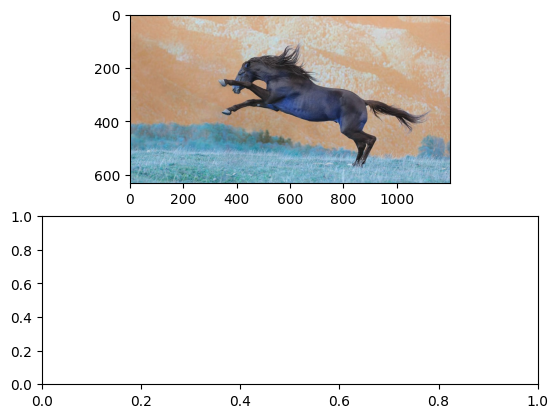

In [33]:
def create_chart(df: pd.DataFrame, class_label: int) -> None:
    """
    Accepts a dataframe and a class label;


    Args:
        df (pd.DataFrame): _description_
        class_label (int): _description_
    """
    spect, image = get_gists(df, class_label)
    plt.subplot(2, 1, 1)
    plt.imshow(image)

    plt.subplot(2, 1, 2)
    plt.plot(spect[0], color='b')
    plt.plot(spect[1], color='g')
    plt.plot(spect[2], color='r')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(['Blue', 'Green', 'Red'])

    plt.show()

create_chart(df, 0)
